In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

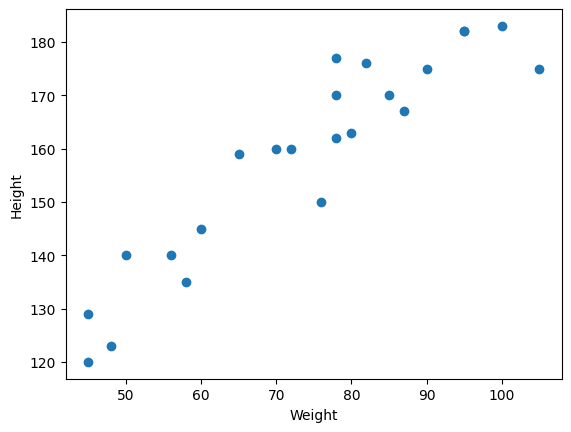

In [5]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
# checking the relation between height and weight is positive or negative
# correlation
df.corr()  #highly positive

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


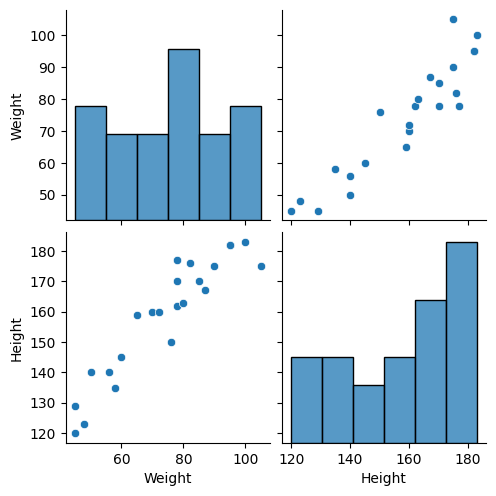

In [7]:
#seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [13]:
#dividing the features into independent and dependent features
# independent features should be data frame or a 2 dimensional array
X = df[['Weight']]
y=df['Height']
np.array(X).shape


(23, 1)

In [15]:
X_series=df['Weight']
np.array(X_series).shape
np.array(y).shape

(23,)

In [16]:
# splitting data into training dataset and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape

(17, 1)

In [18]:
# train test split
from sklearn.model_selection import train_test_split

In [19]:
# Standardization  ==> mean=0, sd=1
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Data Leakage: ml model is accidentally given extra info it shoudn't have during training because of that the model looks super accurate on training/validation, but when you gie it real unseen data, it performs badly


In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 0.15475151],
       [ 1.81328399],
       [ 0.95542236],
       [-0.98906399],
       [-0.76030089],
       [-0.47434702]])

In [25]:
# Apply SLR
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression(n_jobs=-1)

In [30]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [32]:
print("Coefficient or slope: " ,regression.coef_)
print("Intercept: " ,regression.intercept_)

Coefficient or slope:  [19.75159608]
Intercept:  158.76470588235293


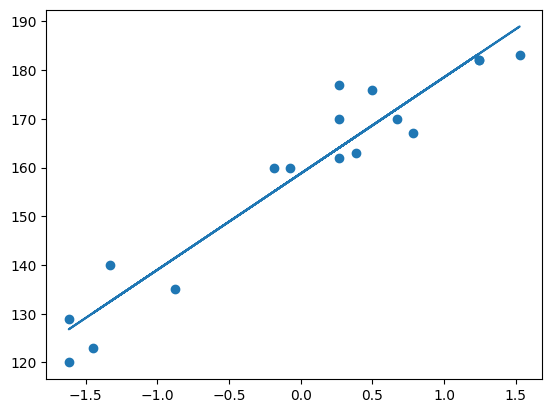

In [34]:
# plotting training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

**Prediction of test data**
1. predict height output = intercept + coef_(weights)
2. y_pred =  158.764 + 19.75(X_test)

In [36]:
# prediction for test data
y_pred = regression.predict(X_test)

In [37]:
print(y_pred)

[161.82129519 194.5799588  177.63582245 139.22911338 143.74754974
 149.39559519]


In [38]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

104.07880935942109
7.610803021043172
10.20190224220077


R square
R^2 = 1 * SSR/SST
r^2 = coefficient of determination
SSR = sum of squares of residuals
SST = total sum of squares

In [40]:
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test, y_pred)
print(score)

0.44899453868541783


**Adjusted R^2**
Adj R^2 = 1 - [(1-R^2)*(n-1)(n-k-1)]
where R^2 is the R^2 of the model
n the no of observations
k the no of predictor variables


In [42]:
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.3112431733567723


In [43]:
# OLS LR
import statsmodels.api as sm

In [46]:
model = sm.OLS(y_train, X_train).fit()

In [47]:
prediction = model.predict(X_test)
print(prediction)

[  3.0565893   35.81525292  18.87111657 -19.5355925  -15.01715614
  -9.36911069]


In [50]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.2473
Date:                Sat, 06 Sep 2025   Prob (F-statistic):                       0.626
Time:                        16:40:36   Log-Likelihood:                         -110.28
No. Observations:                  17   AIC:                                      222.6
Df Residuals:                      16   BIC:                                      223.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
# prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.30285882])